In [17]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "pyfesom")
elif running_system[0:1] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"pyfesom")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append(wd_path)
#sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("pyfesom/") # add standard 's modules
#########################################

computer =  bfn1001
working directory set to /home/hbkoziel/pyfesom


In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
import pyfesom as pf
import numpy as np
import datetime as dt
from netCDF4 import Dataset, MFDataset
import cmocean as cmaps
import cartopy

In [19]:
# PLOT CONFIGURATION #

# load colormaps #
cmap = cmaps.cm.balance
# figure export 
export_plot = True
# figure export definition
dpicnt=150
# choose simulation
runid='Arc12'
# choose date
first_year = 1990
last_year  = 1990
years      = np.arange(first_year,last_year+1,1)
months =np.linspace(0,11,12).astype(int)
print years
print months
# choose depth
get3d = True
# load the given biological tracer #
var_id= 'tr01'

########################

# AUTOMATIC DEFINITION OF PATHS
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/Oldfiles/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = wd_path+'/data/mesh/meshArc4.5/'
outputpath = '/scratch/usr/hbkoziel/Arc12/'

# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)

[1990]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
directory /home/hbkoziel/pyfesom/figures/Arc12/ already existing


In [20]:
mesh = pf.load_mesh(meshpath, usepickle=True)

/home/hbkoziel/pyfesom/data/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /home/hbkoziel/pyfesom/data/mesh/meshArc4.5/pickle_mesh


In [21]:
ind=0
mo=6
print years[ind]
ICECON = np.zeros((len(years),len(mesh.x3)))

ncfile = resultpath+runid+'.'+str(years[ind])+'.oce.mean.nc'

f      = Dataset(ncfile, 'r')
if years[ind]<2000:
    ice    = f.variables[var_id][mo,:]
else:
    ice    = f.variables[var_id][dayind,:].mean(axis=0)

ICECON[ind,:] = ice

data2 = ICECON.mean(axis=0)
print 'Number of nans in tracer: ',np.count_nonzero(np.isnan(data2))
print 'Number of inf in tracer: ',np.count_nonzero(np.isinf(data2))
print 'Mean of surface: ',np.mean(data2[0:len(mesh.x2)])
print 'Max and min: ',np.max(data2),np.min(data2)
print data2.shape

1990
Number of nans in tracer:  0
Number of inf in tracer:  0
Mean of surface:  2.99506467606
Max and min:  3093.56298828 0.00496864225715
(16950142,)


In [64]:
lon_start = 20
lat_start = 69.5
lon_end   = 20
lat_end   = 75
#pf.plot_transect_map(lon_start, lat_start, lon_end, lat_end, 
#                       mesh, npoints=30, view = 'w', stock_img=False)

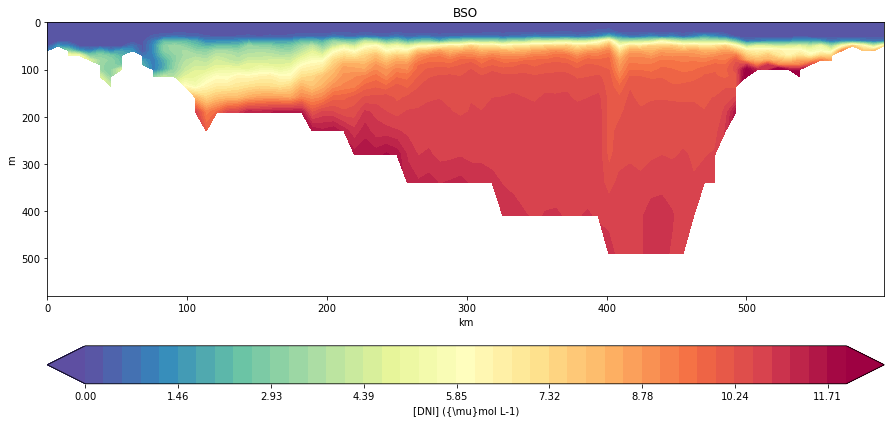

In [65]:
npoints = 80

fig, ax = plt.subplots(1,1, figsize=(15,7))
image = pf.plot_transect(data2, mesh, 
                         lon_start,
                         lat_start,
                         lon_end,
                         lat_end,
                         npoints=npoints,
                         levels = np.round(np.linspace(0, 12, 42),2),
                         cmap=cm.Spectral_r,
                         maxdepth =650,
                         title = 'BSO',
                         ncols=1,
                         figsize=(5,10),
                        ax = ax
                        )
cb = fig.colorbar(image, orientation='horizontal', ax=ax, pad=0.13)
cb.set_label('[DNI] ({\mu}mol L-1)')

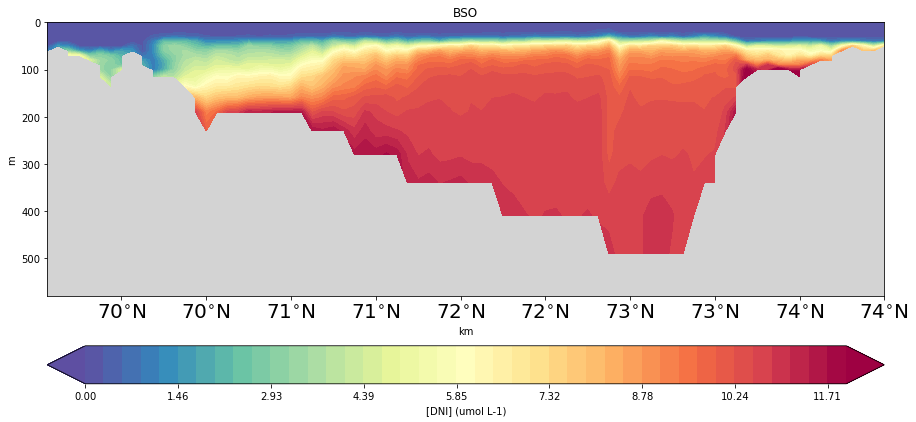

In [66]:
npoints = 80
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints=npoints)
labeles = [str(abs(int(x)))+"$^{\circ}$N" for x in lonlat[7::8][:,1]]
dist   = pf.transect_get_distance(lonlat) # get's distances between starting point and present point

fig, ax = plt.subplots(1,1, figsize=(15,7))
ax.patch.set_facecolor('lightgray')
image = pf.plot_transect(data2, mesh, 
                         lon_start,
                         lat_start,
                         lon_end,
                         lat_end,
                         npoints=npoints,
                         levels = np.round(np.linspace(0, 12, 42),2),
                         cmap=cm.Spectral_r,
                         maxdepth =650,
                         title = 'BSO',
                         ncols=1,
                         figsize=(5,10),
                        ax = ax
                        )
cb = fig.colorbar(image, orientation='horizontal', ax=ax, pad=0.13)
cb.set_label('[DNI] (umol L-1)')
ax.xaxis.set_ticks(dist[7::8])
ax.set_xticklabels(labeles, size=20);
#ax.set_xlim(69,75)


TypeError: 'QuadContourSet' object is not callable

ValueError: Attempted relative import in non-package

In [76]:
nodes  = pf.transect_get_nodes(lonlat, mesh)
dist   = pf.transect_get_distance(lonlat)
profile = pf.transect_get_profile(nodes, mesh)
data = pf.transect_get_data(data2, profile)

In [82]:
print data.shape
print profile.shape
print dist.shape

(80, 47)
(80, 47)
(80,)


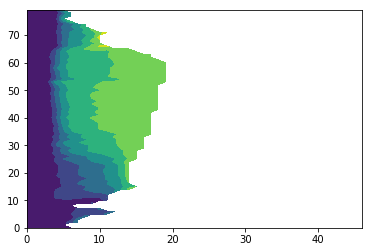

In [90]:
contourf(data)

In [91]:
data.mean()

5.6446418296577159